# <font color = lightcoral>Sequence Matching Finalize
>    

## <font color = grey> Admin

In [1]:
import pandas as pd
import os
import gzip
import time
import warnings
import os
import shutil
from datetime import datetime
import time
# Set display option to show the full length of the column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

# Determine the base directory based on the effective user ID
if os.geteuid() == 0:  # root user
    base_dir = '/root'
else:
    base_dir = '/home/sagemaker-user'

# Set the environment variable
os.environ['BASE_DIR'] = base_dir

# Verify the base directory
print(f"Base directory set to: {base_dir}")

import warnings
warnings.simplefilter("ignore")


Base directory set to: /home/sagemaker-user


---

# <font color = lightsteelblue> 4 Key Files

In [2]:
import pandas as pd
import time

data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04A.Local_Data_Files'

################################## Part 1: Parsed Raw File ###################################

print("\n" + "*"*100)
print("********************** Part1 1: Parsed Raw File ******************************************")
print("*"*100 + "\n")

parsed_file =  f"{data_dir}/01.BGL.log_structured.csv"
parsed_file_df = pd.read_csv(parsed_file)
display(parsed_file_df.head())
print("Shape of Parsed Raw File:", parsed_file_df.shape)

######################### Part 2: Encoded File with Feature for Model Training  ######################

print("\n" + "*"*100)
print("********************** Part 2:  Input Data with Features ******************************************")
print("*"*100 + "\n")

encoded_feature_input_file = f"{data_dir}/03.20240715_143154_orig_input_w_seq_mapping_master_FINAL.parquet"
encoded_feature_input_file_df = pd.read_parquet(encoded_feature_input_file)
display(encoded_feature_input_file_df.iloc[:, :25].head())
print("Shape of Encoded File with Features:", encoded_feature_input_file_df.shape)

# ######################### Part 3: Event_ID to Template Mapping  #######################################

print("\n" + "*"*100)
print("********************** Part 3: Event_ID to Template Mapping ******************************************")
print("*"*100 + "\n")

eventid_template_file = f"{data_dir}/04.20240711_Template_to_EventID_Mapping_v1.00.csv"
eventid_template_df = pd.read_csv(eventid_template_file)
display(eventid_template_df.head())
print("Shape of Event_ID to Template Mapping:", eventid_template_df.shape)

# ######################### Part 4: Event_ID to Encoding Mapping  #######################################

print("\n" + "*"*100)
print("********************** Part 4:  Event_ID to Encoding Mapping ******************************************")
print("*"*100 + "\n")

eventid_encoding_file = f"{data_dir}/05.20240711_EventID_to_EncodedInteger_Mapping_v1.00.csv"
eventid_encoding_df = pd.read_csv(eventid_encoding_file)
display(eventid_encoding_df.head())
print("Shape of Event_ID to Encoding Mapping:", eventid_encoding_df.shape)


****************************************************************************************************
********************** Part1 1: Parsed Raw File ******************************************
****************************************************************************************************



,LineId,Label,Id,Date,Code1,Time,Code2,Component1,Component2,Level,Content,EventId,EventTemplate
0,1,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.363779,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
1,2,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.527847,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
2,3,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.675872,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
3,4,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.823719,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
4,5,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.982731,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected


Shape of Parsed Raw File: (4713493, 13)

****************************************************************************************************
********************** Part 2:  Input Data with Features ******************************************
****************************************************************************************************



,Seq_Num,Train_Test,time_start,time_start_int,Class,unique_events,most_frequent_event,transitions,entropy,hour_of_day,day_of_week,event_count,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,EventId_1,EventId_2,EventId_3,EventId_4,EventId_5
0,0,Train,2005-06-03 16:00:00,0,0,6,228,6,0.171708,16,4,465,35431,913.0,0.012903,0,0.000000,0.171708,4895.0,18.0,228,228,228,228,228
1,1,Train,2005-06-03 16:05:00,1,0,2,987,2,0.598270,16,4,7,35433,465.0,0.285714,0,0.171708,0.426562,4257.0,19.0,729,987,987,987,987
2,2,Train,2005-06-03 16:10:00,2,0,6,399,18,0.655243,16,4,81,35431,7.0,0.222222,0,0.598270,0.056973,2756.0,23.0,734,430,504,95,95
3,3,Train,2005-06-03 16:15:00,3,0,5,328,6,1.039660,16,4,66,35431,81.0,0.090909,0,0.655243,0.384418,1532.0,25.0,987,987,987,987,328
4,4,Train,2005-06-03 16:25:00,5,0,4,399,3,0.895333,16,4,14,35433,66.0,0.214286,0,1.039660,-0.144328,633.0,28.0,95,504,504,399,399


Shape of Encoded File with Features: (14537, 35453)

****************************************************************************************************
********************** Part 3: Event_ID to Template Mapping ******************************************
****************************************************************************************************



,EventId,EventTemplate,Occurrences
0,3aa50e45,instruction cache parity error corrected,105924
1,b9250ad9,MidplaneSwitchController performing bit sparing on R<*>-M<*>-L<*>-U<*>-C bit <*>,964
2,fc5f0940,generating core.<*>,1706751
3,1840cbfe,"<*> ddr errors(s) detected and corrected on rank <*>, symbol <*>, bit <*>",33939
4,828a502b,<*> <*> <*> error(s) (dcr <*>) detected and corrected,5040


Shape of Event_ID to Template Mapping: (1000, 3)

****************************************************************************************************
********************** Part 4:  Event_ID to Encoding Mapping ******************************************
****************************************************************************************************



,EventId,EncodedValue
0,0025df56,0
1,0045c3a8,1
2,004a68ba,2
3,00980b01,3
4,00d49120,4


Shape of Event_ID to Encoding Mapping: (1000, 2)


___
# <font color = blue> Part 2. Run Inference (Manual)

In [5]:
import os
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from datetime import datetime
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Set options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Parameters
data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04A.Local_Data_Files'
inference_dir = '/home/ubuntu/efs-w210-capstone-ebs/04C.Local_Inference_Eval_Files'

model_folder_path = '/home/ubuntu/efs-w210-capstone-ebs/04B.Local_Model_Files/20240713_Non_Overlapping_Consl_180_FINAL'
trained_model_file = f"{model_folder_path}/20240712_Transformers_Non_Overlapping_run_133_of_180.pt"

# File prefix (should match the one used in Part 1)
file_prefix = "06.20240714_062624_non_overlap_full_test"  # Replace with the actual prefix from Part 1

# Model parameters
input_length = 20
hidden_size = 64
dropout = 0.3
num_layers = 2

# Load the test data
X_test = np.load(f"{data_dir}/{file_prefix}_X_test.npy")
y_test = np.load(f"{data_dir}/{file_prefix}_y_test.npy")

# Drop the first column from X_test
X_test = X_test[:, :, 1:]

# Load the original parquet file with sequence mapping
input_file = f"{data_dir}/03.20240715_143154_orig_input_w_seq_mapping_master_FINAL.parquet"
original_df = pd.read_parquet(input_file)

# Identify the first instance where Train_Test is 'Test'
seq_start = original_df[original_df['Train_Test'] == 'Test'].iloc[0]['Seq_Num']

# Transformer Model Definition
class TransformerModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout=0.5):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_size, hidden_size)
        self.pos_encoder = nn.Embedding(input_length, hidden_size)
        self.transformer = nn.Transformer(hidden_size, nhead=4, num_encoder_layers=num_layers, num_decoder_layers=num_layers, dropout=dropout)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.embedding(x)
        positions = torch.arange(0, x.size(1), device=x.device).unsqueeze(0)
        x = x + self.pos_encoder(positions)
        x = self.transformer(x, x)
        x = self.fc(x[:, -1, :])
        return x

# Model Evaluation
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

input_size = X_test.shape[2]
model = TransformerModel(input_size, hidden_size, num_layers, 1, dropout)
model.load_state_dict(torch.load(trained_model_file))

model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_outputs = torch.sigmoid(test_outputs)
    test_outputs = test_outputs.cpu().numpy()

    test_preds = (test_outputs > 0.5).astype(int)

# Create DataFrame for tracking
tracking_data = []

for i in range(len(test_preds)):
    total_seq_start = seq_start + i * 23
    total_seq_end = total_seq_start + 23 - 1
    source_seq_start = total_seq_start
    source_seq_end = source_seq_start + input_length - 1
    gap_seq_start = source_seq_end + 1
    gap_seq_end = gap_seq_start + 1
    prediction_seq_start = total_seq_end - 1
    prediction_seq_end = total_seq_end
    
    tracking_data.append([
        total_seq_start, total_seq_end, source_seq_start, source_seq_end,
        gap_seq_start, gap_seq_end, prediction_seq_start, prediction_seq_end,
        test_preds[i][0], y_test[i]
    ])

tracking_df = pd.DataFrame(tracking_data, columns=[
    "Total_Seq_Start", "Total_Seq_End", "Source_Seq_Start", "Source_Seq_End",
    "Gap_Seq_Start", "Gap_Seq_End", "Prediction_Seq_Start", "Prediction_Seq_End",
    "Predicted", "Actual"
])

# Merge with original data
merged_df = tracking_df.merge(original_df, left_on='Source_Seq_Start', right_on='Seq_Num', how='left')

# Save the DataFrame to a CSV file
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
output_file = f"{inference_dir}/{timestamp}_non_overlapping_inference_mapping_results.csv"
merged_df.to_csv(output_file, index=False)

print(f"Tracking file saved to {output_file}")

# Display the first 20 columns of all rows in the new DataFrame
pd.set_option('display.max_columns', 20)
display(merged_df.iloc[:, :20])

# Calculate and print metrics
conf_matrix = confusion_matrix(y_test_tensor.cpu().numpy(), test_preds)
precision = precision_score(y_test_tensor.cpu().numpy(), test_preds, zero_division=0)
recall = recall_score(y_test_tensor.cpu().numpy(), test_preds, zero_division=0)
accuracy = accuracy_score(y_test_tensor.cpu().numpy(), test_preds)
f1 = f1_score(y_test_tensor.cpu().numpy(), test_preds, zero_division=0)
tn, fp, fn, tp = conf_matrix.ravel()

print("\nEvaluation Results:")
print(f"Precision={precision:.6f}, Recall={recall:.6f}, Accuracy={accuracy:.6f}, F1={f1:.6f}, TN={tn}, FP={fp}, FN={fn}, TP={tp}")

Tracking file saved to /home/ubuntu/efs-w210-capstone-ebs/04C.Local_Inference_Eval_Files/20240715_144652_non_overlapping_inference_mapping_results.csv


,Total_Seq_Start,Total_Seq_End,Source_Seq_Start,Source_Seq_End,Gap_Seq_Start,Gap_Seq_End,Prediction_Seq_Start,Prediction_Seq_End,Predicted,Actual,Seq_Num,Train_Test,time_start,time_start_int,Class,unique_events,most_frequent_event,transitions,entropy,hour_of_day
0,11615,11637,11615,11634,11635,11636,11636,11637,0,0.0,11615,Test,2005-11-08 16:10:00,45506,0,1,68,0,0.000000,16
1,11638,11660,11638,11657,11658,11659,11659,11660,0,0.0,11638,Test,2005-11-08 23:00:00,45588,0,1,231,0,0.000000,23
2,11661,11683,11661,11680,11681,11682,11682,11683,1,0.0,11661,Test,2005-11-09 12:50:00,45754,0,1,231,0,0.000000,12
3,11684,11706,11684,11703,11704,11705,11705,11706,1,0.0,11684,Test,2005-11-09 18:45:00,45825,0,2,108,1,0.348832,18
4,11707,11729,11707,11726,11727,11728,11728,11729,1,0.0,11707,Test,2005-11-10 07:20:00,45976,0,5,201,15,0.419213,7
5,11730,11752,11730,11749,11750,11751,11751,11752,1,0.0,11730,Test,2005-11-10 19:05:00,46117,1,38,399,111,1.575391,19
6,11753,11775,11753,11772,11773,11774,11774,11775,0,0.0,11753,Test,2005-11-11 04:45:00,46233,0,5,399,13,1.073979,4
7,11776,11798,11776,11795,11796,11797,11797,11798,0,0.0,11776,Test,2005-11-11 10:45:00,46305,1,3,912,2,1.098612,10
8,11799,11821,11799,11818,11819,11820,11820,11821,0,0.0,11799,Test,2005-11-11 17:50:00,46390,0,1,231,0,0.000000,17
9,11822,11844,11822,11841,11842,11843,11843,11844,0,0.0,11822,Test,2005-11-12 14:45:00,46641,0,1,976,0,0.000000,14



Evaluation Results:
Precision=0.085106, Recall=0.888889, Accuracy=0.314961, F1=0.155340, TN=32, FP=86, FN=1, TP=8


---
# <font color = teal> Data Review (Source vs Test) --> Current

In [6]:
import numpy as np

data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04A.Local_Data_Files'
file_prefix = "06.20240714_062624_non_overlap_full_test"

# Load the test data
X_test = np.load(f"{data_dir}/{file_prefix}_X_test.npy")
y_test = np.load(f"{data_dir}/{file_prefix}_y_test.npy")

# Print the shapes of the test files
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_test: (127, 20, 56)
Shape of y_test: (127,)


In [8]:
import pandas as pd

data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04A.Local_Data_Files'
encoded_feature_input_file = f"{data_dir}/03.20240715_143154_orig_input_w_seq_mapping_master_FINAL.parquet"

# Load the original parquet file
df = pd.read_parquet(encoded_feature_input_file)

# Get the count of records for each value of Train_Test
train_test_counts = df['Train_Test'].value_counts()

# Get the min and max sequence for each value of Train_Test
train_test_min_max = df.groupby('Train_Test')['Seq_Num'].agg(['min', 'max'])

# Print the results
print("Count of records for each Train_Test value:")
print(train_test_counts)
print("\nMin and Max sequence for each Train_Test value:")
print(train_test_min_max)

Count of records for each Train_Test value:
Train_Test
Train    11615
Test      2922
Name: count, dtype: int64

Min and Max sequence for each Train_Test value:
              min    max
Train_Test              
Test        11615  14536
Train           0  11614


---
# <font color = red> Generate Mapping File
## <font color = blue> One Time Only --> DONE
## <font color  = grey>Tie Back Source with Test by generating new test files and creating mapping file

In [ ]:
import os
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from datetime import datetime

# Parameters
data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04A.Local_Data_Files'
encoded_feature_input_file = f"{data_dir}/03.20240715_012157_orig_input_w_seq_mapping_master_UPDATED.parquet"
output_dir = '/home/ubuntu/efs-w210-capstone-ebs/04A.Local_Data_Files/20240715_Source_Test_Recon_Only'

# Generate timestamp and serial number
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
serial_number = "0001"  # You can increment this for each run
file_prefix = f"{timestamp}_non_overlap_full_test"

# Required parameters
max_events = 40
input_length = 20
gap = 2
prediction_period = 1
test_size = 0.2
shuffle = False
random_seed = 42

# Set random seed for reproducibility
np.random.seed(random_seed)
random.seed(random_seed)

# Data Preprocessing
df = pd.read_parquet(encoded_feature_input_file)

# Ensure no negative values in event_id columns
event_id_columns = [col for col in df.columns if col.startswith('EventId_')]
df[event_id_columns].replace(-1, 0, inplace=True)

# Define the columns to be used for scaling
selected_columns = ['time_start_int', 'Class', 'unique_events', 'most_frequent_event', 'transitions', 'entropy', 
                    'hour_of_day', 'day_of_week', 'event_count', 'top_event_frequency', 'prev_event_count', 
                    'transition_rate', 'high_transition_rate', 'prev_entropy', 'entropy_change', 
                    'rolling_event_count', 'rolling_unique_event_count']

# Apply scaling
scaler = StandardScaler()
numerical_features = ['unique_events', 'transitions', 'entropy', 'hour_of_day', 'day_of_week', 'event_count', 
                      'top_event_frequency', 'prev_event_count', 'transition_rate', 'prev_entropy', 
                      'entropy_change', 'rolling_event_count', 'rolling_unique_event_count']
df[selected_columns[2:]] = scaler.fit_transform(df[selected_columns[2:]])

# Encode categorical features
label_encoder = LabelEncoder()
df['most_frequent_event'] = label_encoder.fit_transform(df['most_frequent_event'])

# Apply PCA to event_id columns
pca = PCA(n_components=max_events)
event_id_pca = pca.fit_transform(df[event_id_columns])
event_id_pca_df = pd.DataFrame(event_id_pca, columns=[f'EventId_PCA_{i+1}' for i in range(max_events)])

# Combine all features
df_reduced = pd.concat([df[['Seq_Num', 'Train_Test'] + selected_columns], event_id_pca_df], axis=1)

# Function to create sequences
def create_sequences(data, time_index_col, feature_cols, target_col, input_length, gap=2, prediction_period=1):
    sequences = []
    targets = []
    seq_nums = []
    
    start_idx = 0
    total_length = len(data)
    while start_idx + input_length + gap + prediction_period <= total_length:
        end_idx = start_idx + input_length
        sequence = data[feature_cols].iloc[start_idx:end_idx].values
        target = data[target_col].iloc[end_idx + gap:end_idx + gap + prediction_period].values[0]
        
        # Calculate detailed sequence numbers
        total_seq_start = data['Seq_Num'].iloc[start_idx]
        source_seq_start = data['Seq_Num'].iloc[start_idx]
        source_seq_end = data['Seq_Num'].iloc[end_idx - 1]
        gap_seq_start = data['Seq_Num'].iloc[end_idx]
        gap_seq_end = data['Seq_Num'].iloc[end_idx + gap - 1]
        prediction_seq_start = data['Seq_Num'].iloc[end_idx + gap]
        prediction_seq_end = data['Seq_Num'].iloc[end_idx + gap + prediction_period - 1]
        total_seq_end = prediction_seq_end  # Corrected to align with the end of the prediction period
        
        sequences.append(sequence)
        targets.append(target)
        seq_nums.append((total_seq_start, total_seq_end, source_seq_start, source_seq_end, gap_seq_start, gap_seq_end, prediction_seq_start, prediction_seq_end))
        start_idx = end_idx + gap + prediction_period
    
    return np.array(sequences), np.array(targets), seq_nums

# Define feature and target columns
feature_cols = [col for col in df_reduced.columns if col not in ['Seq_Num', 'Train_Test', 'Class']]
target_col = 'Class'

# Create sequences
X, y, seq_nums = create_sequences(df_reduced, 'time_start_int', feature_cols, target_col, input_length=input_length, gap=gap, prediction_period=prediction_period)

# Split into train and test sets
X_train, X_test, y_train, y_test, seq_nums_train, seq_nums_test = train_test_split(X, y, seq_nums, test_size=test_size, shuffle=shuffle, random_state=random_seed)

# Save the test data
np.save(f"{output_dir}/{file_prefix}_X_test.npy", X_test)
np.save(f"{output_dir}/{file_prefix}_y_test.npy", y_test)

# Save the sequence number mapping with detailed sequence numbers
seq_num_mapping_df = pd.DataFrame(seq_nums_test, columns=['Total_Seq_Start', 'Total_Seq_End', 'Source_Seq_Start', 'Source_Seq_End', 'Gap_Seq_Start', 'Gap_Seq_End', 'Prediction_Seq_Start', 'Prediction_Seq_End'])
seq_num_mapping_file = f"{output_dir}/{file_prefix}_seq_num_mapping.csv"
seq_num_mapping_df.to_csv(seq_num_mapping_file, index=False)

# Identify the starting point of the test data
test_start_index = len(X_train)
test_start_seq_num = seq_nums[test_start_index][0]

print(f"Test data saved to {output_dir}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"File prefix: {file_prefix}")
print(f"Seq_Num mapping file saved to {seq_num_mapping_file}")
print(f"Test data starts at sequence number: {test_start_seq_num}")

---
## <font color = grey> Generated Mappings
> <font color = red>Note the seq start at 11615 (whereas we had this initally but changed to 11611 for test)

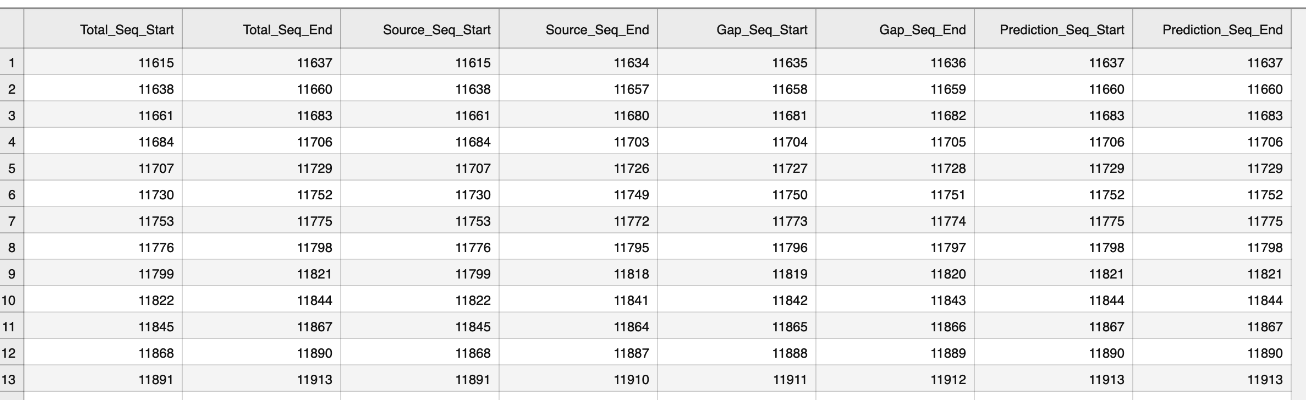

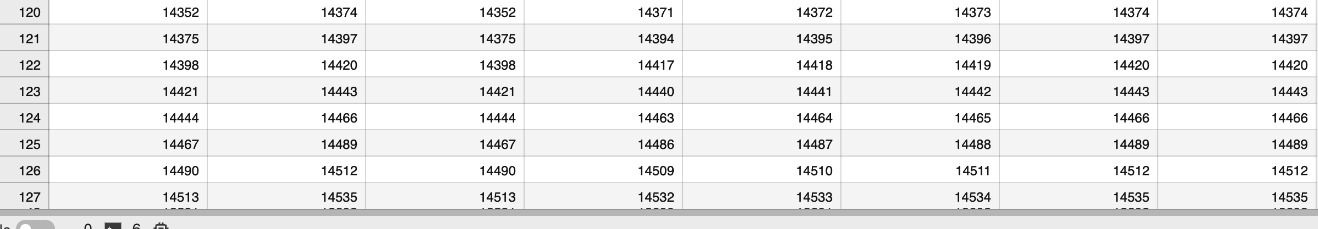

___
# <font color = pink> Adjust SEQ_NUM to 11615 from 11611 in Original Parquet File

---
## <font color = grey> Review Source Parquet File for Seq_Num
> <font color = red>Revised the Seq_Num for Test as needed -- Note the seq start at 11615 (whereas we had this initally but changed to 11611 for test)

In [ ]:
# import pandas as pd

# # Parameters
# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04A.Local_Data_Files'
# encoded_feature_input_file = f"{data_dir}/03.20240715_012157_orig_input_w_seq_mapping_master_UPDATED.parquet"

# # Load the parquet file
# encoded_feature_input_file_df = pd.read_parquet(encoded_feature_input_file)

# # Display the first 10 rows
# print("First 10 rows:")
# display(encoded_feature_input_file_df.iloc[:10, :25])

# # Display the last 10 rows
# print("\nLast 10 rows:")
# display(encoded_feature_input_file_df.iloc[-10:, :25])

# # Display the rows with index 11600 to 11630
# print("\nRows with index 11600 to 11630:")
# display(encoded_feature_input_file_df.loc[11600:11630].iloc[:, :25])

# # Print the shape of the dataframe
# print("\nShape of Encoded File with Features:", encoded_feature_input_file_df.shape)

## <font color = grey> Data Fix: One Time Only - DONE

In [9]:
# import pandas as pd

# # Parameters
# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04A.Local_Data_Files'
# encoded_feature_input_file = f"{data_dir}/03.20240715_012157_orig_input_w_seq_mapping_master_UPDATED.parquet"
# new_encoded_feature_output_file = f"{data_dir}/03.20240715_012157_orig_input_w_seq_mapping_master_UPDATED_corrected.parquet"

# # Load the original parquet file
# df = pd.read_parquet(encoded_feature_input_file)

# # Display the rows with index 11600 to 11630 for verification
# print("\nRows with index 11600 to 11630 before modification:")
# display(df.loc[11600:11630].iloc[:, :25])

# # Modify the 'Train_Test' column for Seq_Num 11611-11614 from 'Test' to 'Train'
# df.loc[11611:11614, 'Train_Test'] = 'Train'

# # Display the rows with index 11600 to 11630 for verification after modification
# print("\nRows with index 11600 to 11630 after modification:")
# display(df.loc[11600:11630].iloc[:, :25])

# # Save the modified dataframe to a new parquet file
# df.to_parquet(new_encoded_feature_output_file, index=False)

# print(f"Modified parquet file saved to {new_encoded_feature_output_file}")